In [1]:
import cv2
import os
from PIL import Image
import numpy as np
dim = (30, 30)
X_train =[]
Y_train=[]
n=0

#read train data
pathTrain='/kaggle/input/gtsrb-german-traffic-sign/train'
grup = os.listdir(pathTrain)
for i in grup:
    tem=os.path.join(pathTrain, i)
    img_nams=os.listdir(tem)
    n+=1
    for imasg in img_nams:
        img=np.array(Image.open(os.path.join(tem,imasg )).resize((30,30),Image.ANTIALIAS))
        X_train.append(img)
        s=int(i)
        Y_train.append(s)



X_t=np.array(X_train)
X_t = X_t.astype('float32')
X_train=X_t/255.0


Y_train=np.array(Y_train)
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train)
#shuffle
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train,Y_train, random_state=0)

print(n)



Using TensorFlow backend.


43


In [23]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

from keras import optimizers
sgd=optimizers.SGD(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


trained_model = model.fit(X_train, Y_train, batch_size=128, epochs=15 , validation_split = 0.2)
history=trained_model.history

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 26s 837us/step - loss: 3.5952 - accuracy: 0.0656 - val_loss: 3.4768 - val_accuracy: 0.0719
Epoch 2/15
31367/31367 [==============================] - 25s 790us/step - loss: 3.2152 - accuracy: 0.1930 - val_loss: 5.2526 - val_accuracy: 0.0680
Epoch 3/15
31367/31367 [==============================] - 26s 815us/step - loss: 2.2680 - accuracy: 0.4410 - val_loss: 3.5457 - val_accuracy: 0.2901
Epoch 4/15
31367/31367 [==============================] - 25s 806us/step - loss: 1.3047 - accuracy: 0.6702 - val_loss: 3.5024 - val_accuracy: 0.4130
Epoch 5/15
31367/31367 [==============================] - 25s 804us/step - loss: 0.8756 - accuracy: 0.7842 - val_loss: 0.8424 - val_accuracy: 0.7703
Epoch 6/15
31367/31367 [==============================] - 25s 812us/step - loss: 0.6463 - accuracy: 0.8416 - val_loss: 2.0336 - val_accuracy: 0.6199
Epoch 7/15
31367/31367 [==============================] -

In [24]:
#read test data
import pandas as pd
data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

X_test =[]
Y_test=[]
path='/kaggle/input/gtsrb-german-traffic-sign/test'

grup = os.listdir(path)
for imasg in grup:
    n+=1
    if(imasg!='GT-final_test.csv'):
        img=np.array(Image.open(os.path.join(path,imasg )).resize((30,30),Image.ANTIALIAS))
        X_test.append(img)
        p=(os.path.join('Test',imasg ))
        Y_test.append(data.loc[data['Path'] == p, 'ClassId'].iloc[0])

        
        
X_t=np.array(X_test)
X_t = X_t.astype('float32')
X_test=X_t/255.0
Y_test=np.array(Y_test)

from keras.utils import np_utils
Y_test=np_utils.to_categorical(Y_test)


In [25]:

test_loss,test_acc=model.evaluate(X_test,Y_test)
predicted_labels=model.predict(X_test)
print("SGD")
print("loss: ", test_loss,"  acc: ",test_acc)

12630/12630 [==============================] - 3s 243us/step
SGD
loss:  0.9726253968991652   acc:  0.8372129797935486


In [26]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model2.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model2.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

from keras import optimizers
# sgd=optimizers.SGD(learning_rate=0.01)
adam=optimizers.Adam(learning_rate=0.01)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


trained_model = model2.fit(X_train, Y_train, batch_size=128, epochs=15 , validation_split = 0.2)
history_gen=trained_model.history

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 22s 694us/step - loss: 1.0239 - accuracy: 0.7367 - val_loss: 0.3132 - val_accuracy: 0.9120
Epoch 2/15
31367/31367 [==============================] - 22s 709us/step - loss: 0.1798 - accuracy: 0.9537 - val_loss: 0.1395 - val_accuracy: 0.9688
Epoch 3/15
31367/31367 [==============================] - 21s 684us/step - loss: 0.0828 - accuracy: 0.9795 - val_loss: 0.1321 - val_accuracy: 0.9690
Epoch 4/15
31367/31367 [==============================] - 21s 685us/step - loss: 0.0476 - accuracy: 0.9877 - val_loss: 0.0876 - val_accuracy: 0.9783
Epoch 5/15
31367/31367 [==============================] - 22s 706us/step - loss: 0.0335 - accuracy: 0.9903 - val_loss: 0.1081 - val_accuracy: 0.9778
Epoch 6/15
31367/31367 [==============================] - 22s 685us/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.1087 - val_accuracy: 0.9764
Epoch 7/15
31367/31367 [==============================] -

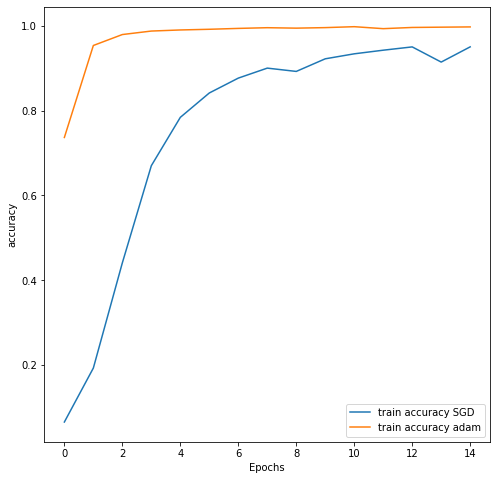

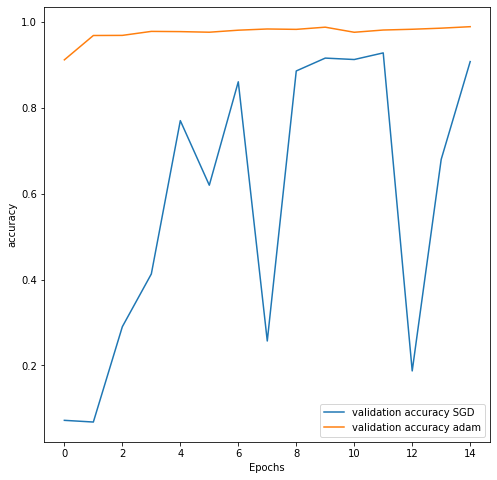

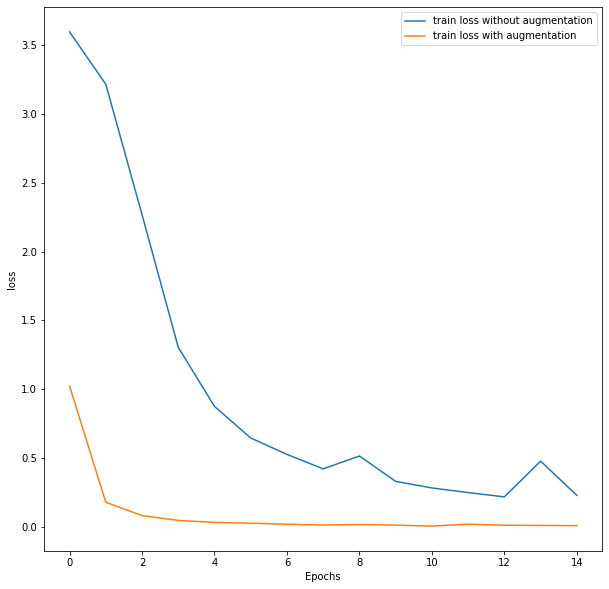

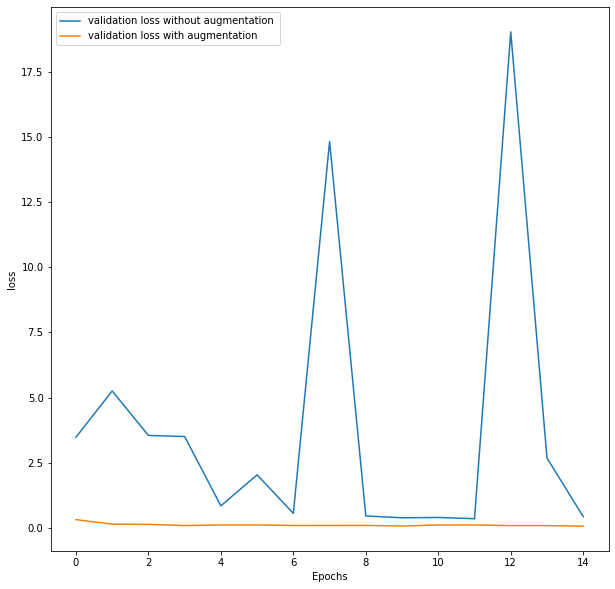

In [29]:
import matplotlib.pyplot as plt


losses=history['loss']
val_losses=history['val_loss']

acc=history['accuracy']
val_acc = history['val_accuracy']

losses_gen=history_gen['loss']
val_losses_gen=history_gen['val_loss']

acc_gen=history_gen['accuracy']
val_acc_gen = history_gen['val_accuracy']



plt.figure(figsize=(8,8))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(acc_gen)
plt.legend(['train accuracy SGD','train accuracy adam'])

plt.figure(figsize=(8,8))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(val_acc)
plt.plot(val_acc_gen)
plt.legend(['validation accuracy SGD ','validation accuracy adam'])

# plt.figure(figsize=(10,10))
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# plt.plot(losses)
# plt.plot(losses_gen)
# plt.legend(['train loss without augmentation','train loss with augmentation'])

# plt.figure(figsize=(10,10))
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# plt.plot(val_losses)
# plt.plot(val_losses_gen)
# plt.legend(['validation loss without augmentation ','validation loss with augmentation'])

In [28]:
test_loss,test_acc=model2.evaluate(X_test,Y_test)
predicted_labels=model2.predict(X_test)
print("with adam\n")
print("loss: ", test_loss,"  acc: ",test_acc)

12630/12630 [==============================] - 3s 249us/step
with adam

loss:  0.43255919223397216   acc:  0.9376088380813599
